# IMB PingPong performance comparison

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
mpl.rcParams['figure.figsize'] = (12,4)
import seaborn as sns
sns.set_style("white", {"font.family": "serif"})

In [2]:
import sys
sys.path.append('../../../python-modules')

In [3]:
from utilities import filemanip

In [4]:
from synthanalysis import imb

In [5]:
benchmark = "PingPong"
systems = ['ARCHER_CrayMPICH774',
           'ARCHER2_CrayMPICH8015',
           'Cirrus_IMPI18',
           'Cirrus_MPT218',
           'Fulhame_OMPI4',
           'Fulhame_MVAPICH231',
           'Fulhame_HMPT220',
           'Isambard_CrayMPICH776',
           'Tesseract_IMPI181',
           'Peta4-Skylake_IMPI193',
           'Athena_IMPI182']
nodelist = [1, 2, 4, 8, 16, 32]
imb_perf = []
for system in systems:
    tdict = {}
    for nodes in nodelist:
        stem = 'IMB_{0}_{1}nodes'.format(benchmark, nodes)
        imbfiles = filemanip.get_filelist('../results/' + system, stem)
        if len(imbfiles) > 0:
            tlist = imb.get_perf_dict(imbfiles[0], nodes, system)
            imb_perf.extend(tlist)
imb_df = pd.DataFrame(imb_perf)
imb.get_perf_stats(imb_df)

                                                   Perf                      \
                                                    min    median       max   
System                Nodes Processes Size                                    
ARCHER2_CrayMPICH8015 1     2         0            0.00      0.00      0.00   
                                      1            1.35      1.35      1.35   
                                      2            2.75      2.75      2.75   
                                      4            5.19      5.19      5.19   
                                      8           10.35     10.35     10.35   
...                                                 ...       ...       ...   
Tesseract_IMPI181     32    2         262144   15361.00  15361.00  15361.00   
                                      524288   14339.31  14339.31  14339.31   
                                      1048576   8517.98   8517.98   8517.98   
                                      2097152   6497

/home/jovyan/work/synth/IMB/analysis/../../../python-modules/synthanalysis/imb.py:41: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_num = df.drop(['File', 'Date'], 1)


/home/jovyan/work/synth/IMB/analysis/../../../python-modules/synthanalysis/imb.py:47: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_num = df.drop(['File', 'Date'], 1)


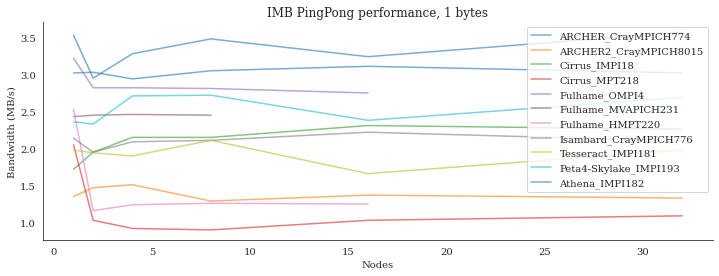

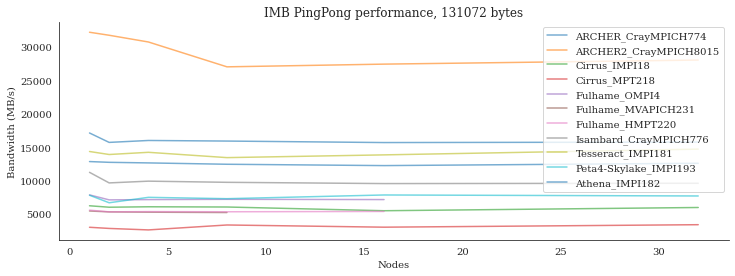

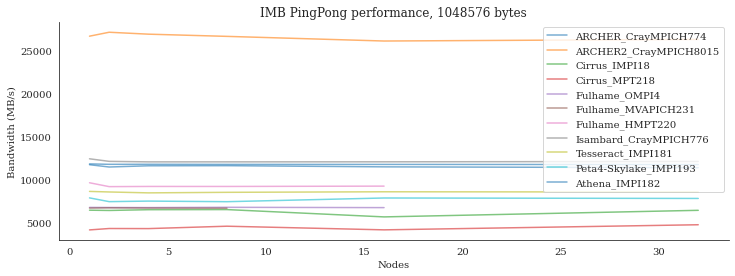

In [6]:
sizelist = [1, 131072, 1048576]
# Plot performance
for size in sizelist:
    plt.clf()
    for system in systems:
        nodes, perf = imb.get_node_scaling_df(imb_df, system, size, 'max')
        plt.plot(nodes, perf, label=f'{system}', alpha=0.6)
    sns.despine()
    plt.xlabel("Nodes")
    plt.ylabel("Bandwidth (MB/s)")
    plt.title(f'IMB {benchmark} performance, {size} bytes')
    plt.legend(loc='best')
    plt.show()
    

/home/jovyan/work/synth/IMB/analysis/../../../python-modules/synthanalysis/imb.py:61: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_num = df.drop(['File', 'Date'], 1)


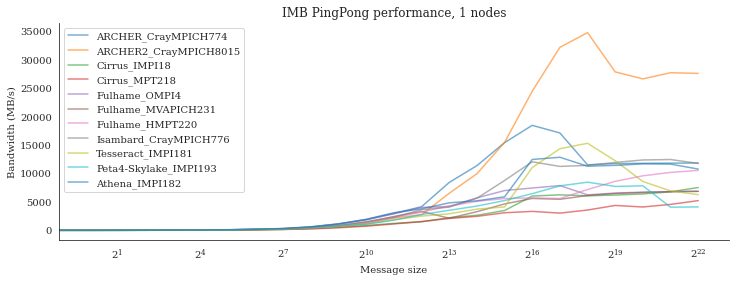

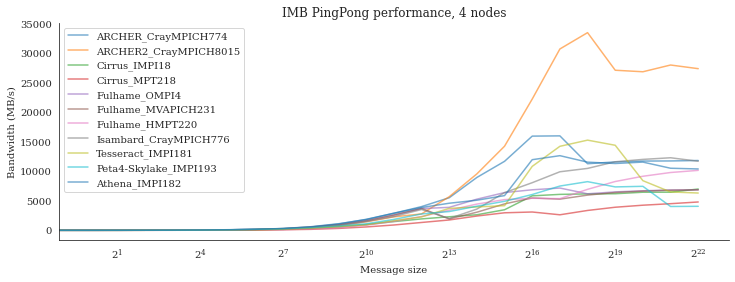

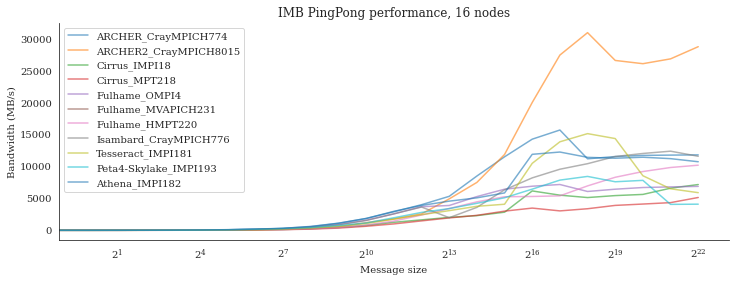

In [7]:
nodelist = [1, 4, 16]
# Plot performance
for node in nodelist:
    plt.clf()
    for system in systems:
        sizes, perf = imb.get_size_scaling_df(imb_df, system, node, 'max')
        plt.plot(sizes, perf, label=f'{system}', alpha=0.6)
    sns.despine()
    plt.xscale('log', base=2)
    plt.xlabel("Message size")
    plt.ylabel("Bandwidth (MB/s)")
    plt.title(f'IMB {benchmark} performance, {node} nodes')
    plt.legend(loc='best')
    plt.show()

In [8]:
# Compute performance ratio
imb.get_perf_ratio(imb_df, 'ARCHER_CrayMPICH774', systems, 'max', invert=False)

ARCHER_CrayMPICH774 performance ratio to ARCHER_CrayMPICH774 performance
            #nodes
      #bytes         1         2         4         8        16        32
           0     0.000     0.000     0.000     0.000     0.000     0.000
           1     1.000     1.000     1.000     1.000     1.000     1.000
           2     1.000     1.000     1.000     1.000     1.000     1.000
           4     1.000     1.000     1.000     1.000     1.000     1.000
           8     1.000     1.000     1.000     1.000     1.000     1.000
          16     1.000     1.000     1.000     1.000     1.000     1.000
          32     1.000     1.000     1.000     1.000     1.000     1.000
          64     1.000     1.000     1.000     1.000     1.000     1.000
         128     1.000     1.000     1.000     1.000     1.000     1.000
         256     1.000     1.000     1.000     1.000     1.000     1.000
         512     1.000     1.000     1.000     1.000     1.000     1.000
        1024     1.000     1.000

         512     0.972     0.819     0.854     0.808     0.813
        1024     0.951     0.826     0.842     0.809     0.842
        2048     0.976     0.894     0.885     0.886     0.886
        4096     0.972     0.931     0.917     0.911     0.921
        8192     0.498     0.713     0.705     0.717     0.730
       16384     0.502     0.586     0.589     0.103     0.621
       32768     0.453     0.554     0.547     0.563     0.559
       65536     0.403     0.451     0.430     0.441     0.484
      131072     0.459     0.453     0.448     0.453     0.457
      262144     0.542     0.549     0.549     0.550     0.543
      524288     0.558     0.565     0.562     0.566     0.557
     1048576     0.570     0.572     0.571     0.574     0.571
     2097152     0.576     0.580     0.581     0.579     0.577
     4194304     0.580     0.594     0.580     0.596     0.583
Fulhame_MVAPICH231 performance ratio to ARCHER_CrayMPICH774 performance
            #nodes
      #bytes         1     

          16     0.983     0.943     1.047     0.987     0.979     0.989
          32     0.928     0.900     0.989     0.875     0.915     0.928
          64     0.974     1.025     1.019     1.051     1.055     0.985
         128     0.766     0.937     0.915     0.921     0.880     0.850
         256     0.746     0.799     0.825     0.815     0.757     0.796
         512     0.644     0.695     0.695     0.649     0.683     0.618
        1024     0.551     0.551     0.595     0.552     0.621     0.552
        2048     0.605     0.620     0.641     0.600     0.676     0.633
        4096     0.669     0.700     0.689     0.695     0.698     0.681
        8192     0.418     0.657     0.576     0.633     0.639     0.657
       16384     0.375     0.454     0.456     0.466     0.497     0.493
       32768     0.339     0.428     0.420     0.426     0.443     0.444
       65536     0.349     0.403     0.380     0.388     0.452     0.425
      131072     0.456     0.426     0.469     0.45